## Final Project Submission

Please fill out:
* Student name: **ISAAC WANG'ANG'A**
* Student pace:  **PART TIME**
* Scheduled project review date/time: **01/09/2024**
* Instructor name: **WINNIE ANYOSO**



**1.BUSINESS UNDERSTANDING**

The business problem revolves around customer churn, a critical issue for telecom companies like SyriaTel, where retaining existing customers is often more cost-effective than acquiring new ones. 

Predicting churn allows the company to implement proactive retention strategies, improving customer loyalty and profitability.

**1.  Introduction and Problem Statement**

**Project Title:** Predicting Customer Churn for SyriaTel Telecommunications Company

**Problem Statement:** 

To predict whether a customer will churn(stop doing business) with SyriaTel  based on their account details, usage patterns, and service plans;

The project seeks to answer the below questions.

1. Which Features are the most significant predictors of customer churn at SyriaTel, and how can these insights from these features  inform targeted retention strategies?

2. How does the number of customer service interactions impact the likelihood of churn, and what interventions can SyriaTel implement to improve customer satisfaction

3. Can engineered features, such as the cost per minute of calls and customer interaction intensity, enhance the accuracy of churn prediction models,



**Goals and Objectives:** 

Improve customer retention by identifying customers who are at risk customers of churning and taking relevant steps to retain them

**Stakeholders:** SyriaTel Board of Management and Marketing Executives.

**2.DATA COLLECTION AND UNDERSTANDING**

**Data Source**: From Kaggle website: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download

**2.1 DATA UNDERSTANDING**

 This Involves exploring SyriaTel's customer data (account details, usage patterns, and service plans) to identify relevant features and patterns that might indicate a risk of churn.

**DATA LOADING AND IMPORTING RELEVANT LIBRARIES**

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING THE DATA SET
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
#DISPLAY FIRST FIVE ROWS
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

**2.2 DATA DESCRIPTION**

In [4]:
#GETTING GENERAL INFORMATION ON NON-NULL COUNTS AND DATA TYPES FOR PER COLUMN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

 **Data Types:**

 1. There are 4 columns with Object data types which are likely to be categorical. i.e ('state', 'international plan', 'voice mail plan', and 'phone number'.)

 2. There are 8 columns with Integer data types i.e. ('account length', 'area code' ,'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls')

 3. There are 8 columns with Float data types i.e ('total day minutes', 'total day charge', 'total eve charge', 'total night minutes', 'total intl minutes', 'total intl charge'.)

 4. The churn column is a boolean type, indicating that it is a binary variable, typically representing whether a customer churned (True) or not (False).

In [5]:
data.shape

(3333, 21)

The data set has 3333 rows and 21 columns

**Column Descriptions**



1.**state:** The US state where the customer resides.

2.**Area code:** The area code corresponding to the customer’s phone number.

3.**international plan:** Indicates whether the customer has an international calling plan (yes/no).

4.**voice mail plan:** Indicates whether the customer has a voice mail plan (yes/no).

5.**churn:**  A boolean flag indicating whether the customer has churned (left the service).

6.**account length:**  The duration of the customer’s account in days

7.**phone number:** The customer’s phone number.

8.**number vmail messages** The number of voice mail messages the customer has received.

9.**total day minutes:** The total minutes of calls made during the day.

10.**total day calls** The total number of calls made during the day.

11.**total day charge:** The total charges incurred for calls made during the day.

12.**total eve minutes:** The total minutes of calls made during the evening.

13.**total eve calls:**  The total number of calls made during the evening.

14.**total eve charge:**  The total charges incurred for calls made during the evening.

15.**total night minutes:** The total minutes of calls made during the night.

16.**total night calls:** The total number of calls made during the night.

17.**total night charge:** The total charges incurred for calls made during the night.

18.**total intl minutes:** The total minutes of international calls made.

In [6]:
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

**INSIGHTS FROM THE STATISTICS**

Some insights, we get from the statistics are :
1. Customers have a range of account lengths from 1 to 243 days, with a mean of about 101 days. The standard deviation (39.8) indicates variability in account duration.

2. On average, customers use about 179.8 minutes per day, with a substantial range from 0 to 350.8 minutes. This suggests significant differences in daily usage among customers.

3. Average usage is 200.9 minutes per night, also with a wide range from 0 to 395 minutes implying  that customers prefer calling  at night rather than the day.

4. Average night charge is about $17.08, with charges ranging from $1.04 to $30.91. The lower rate compared to daytime rate could possibly be the reason  for higher average minutes usage  during the night

5. Average charge for daytime usage is about $30.56, with charges ranging from $0 to $59.64.

6. Average international calls per customer is 4.48, with a range from 0 to 20 calls.

7. Average international calls per customer is 4.48, with a range from 0 to 20 calls.

8. Features such as total day minutes and total night minutes show a broad range with high maximum values compared to the 75th percentile, indicating the presence of potential outliers.


**3. DATA PREPARATION**

**3.1 DATA CLEANING**

Data cleaning will involve checking for missing values and taking action either by filling them or dropping the rows if they have no significant impact to the Exploratoty Data Analysis.

It will Also involve checking for duplicates, Nan and Infinite values and taking actions on  them either by dropping the items or replacing them as appropriate in line with the goals of our EDA

In [7]:
#CHECKING FOR MISSING VALUES
missing_values = data.isnull().sum()
missing_values 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Outcome**: There are no missing values in the Data set

In [8]:
#CHECK FOR DUPLICATES

duplicates = data.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

0

**Outcome:** There are no Duplicates

**4. EXPLORATORY DATA ANALYSIS**

**4.1 UNIVARIATE ANALYSIS**

**VISUALIZING INTERNATIONAL PLAN VS CHURN**

In [9]:
#CONVERTING ALL RELEVANT CATEGORICAL COLUMNS  TO NUMERICAL COLUMNS

# Convert 'churn' to numerical using pd.get_dummies
data = pd.get_dummies(data, columns=['churn'], drop_first=True)

In [10]:
# Rename the column to just 'churn' for clarity
data.rename(columns={'churn_True': 'churn'}, inplace=True)

In [11]:
#DROP UNIMPORTANT CATEGORICAL DATA

data = data.drop(columns=['phone number','area code','state'])

In [12]:
#CHECK COLUMNS
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

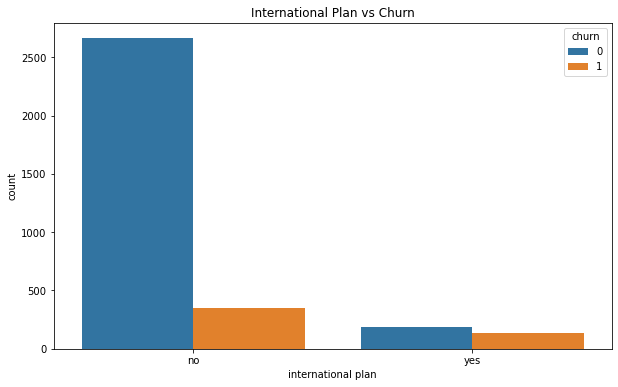

In [13]:
# 1. Univariate Analysis: Distribution of Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(x='international plan', hue='churn', data=data)
plt.title('International Plan vs Churn')
plt.show()

The bar chart titled "International Plan vs Churn" provides the following insights:

**1.Higher Churn for customers with  International Plan:**

A large majority of customers do not have an international plan. Among these customers, most have not churned (represented by the blue bar), while a smaller portion has churned (represented by the orange bar).
The orange bar for churn is significantly lower than the blue bar, indicating that churn is relatively low among customers without an international plan.

There is a smaller number of customers who have an international plan compared to those without one.
Interestingly, for customers with an international plan, the orange bar (indicating churn) is almost equal in height to the blue bar (indicating no churn). 

This suggests that customers with an international plan are more likely to churn compared to those without it. Tus Having an International Plan as a Risk Factor:

**VISUALIZING VOICE MAIL PLAN VS CHURN**

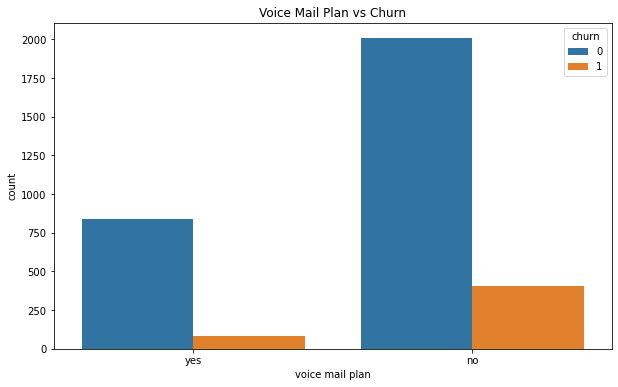

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.title('Voice Mail Plan vs Churn')
plt.show()

The bar chart titled "Voice Mail Plan vs Churn" provides several insights:

**1. Churn by Voice Mail Plan:**

The majority of customers who have a voice mail plan (represented by the "yes" category) do not churn, as indicated by the significantly taller blue bar (indicating no churn) compared to the orange bar (indicating churn).
The number of churned customers with a voice mail plan is very low, suggesting that having a voice mail plan is associated with lower churn rates.


Among customers who do not have a voice mail plan (represented by the "no" category), the blue bar is still taller than the orange bar, indicating that most of these customers do not churn.


However, the orange bar representing churned customers without a voice mail plan is noticeably higher compared to the churned customers with a voice mail plan. This suggests that customers without a voice mail plan are more likely to churn than those with a voice mail plan.


**2. Potential Protective Factor:**

Having a Voice Mail Plan as a Protective Factor:
The chart suggests that having a voice mail plan might serve as a protective factor against churn. Customers who have this plan are less likely to churn compared to those who do not have it.


**VISUALIZING DISTRIBUTION OF NUMERICAL VARIABLES**

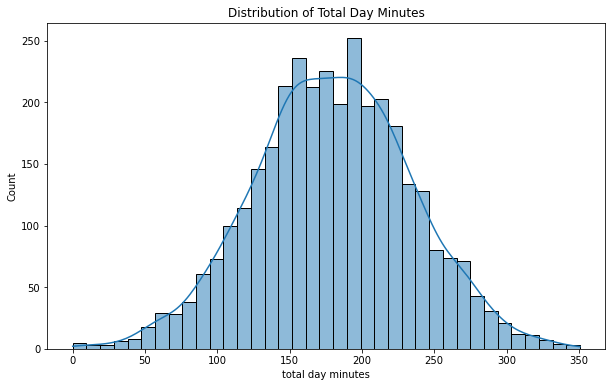

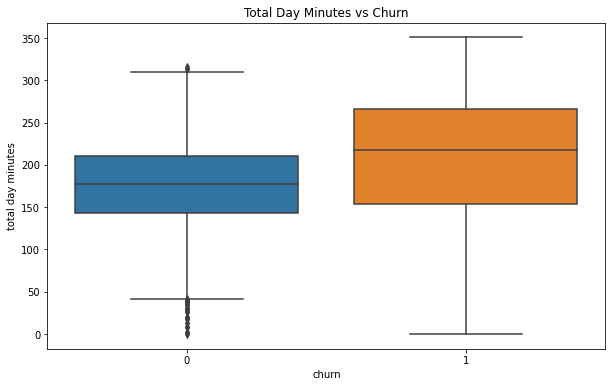

In [15]:
#Univariate Analysis: Distribution of Numerical Variables
plt.figure(figsize=(10, 6))
sns.histplot(data['total day minutes'], kde=True)
plt.title('Distribution of Total Day Minutes')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes vs Churn')
plt.show()

**Insights from Histogram**

The histogram titled "Distribution of Total Day Minutes" provides several insights into the usage patterns of total day minutes among customers:

**1. Bell Shape of the Distribution(Normal Distribution):**

The distribution of total day minutes appears to be roughly bell-shaped and symmetric, which suggests that it follows a normal distribution.
The data is centered around the middle of the range, with the majority of customers having total day minutes in the range of approximately 100 to 250 minutes per day.

**2. Time spend on calls during the day**

The peak of the distribution, where the count of customers is highest, seems to occur around 175 to 200 total day minutes. This indicates that most customers spend around 170 to 200 minutes on the phone during the day.

**Insights from Box Plot**

The box plot titled "Total Day Minutes vs Churn" provides the following insights:

**1. Comparison of Total Day Minutes Between Churned and Non-Churned Customers:
Non-Churned Customers (False):**

The distribution of total day minutes for customers who did not churn (indicated by the blue box) shows that the median total day minutes is around 175 minutes.

The interquartile range (IQR) for non-churned customers is narrower compared to churned customers, indicating that their usage tends to be more consistent and centered around the median.

There are some outliers on the lower end, representing customers with unusually low total day minutes.
Churned Customers (True):

The distribution for customers who churned (indicated by the orange box) shows that the median total day minutes is higher, around 220 minutes.

The IQR for churned customers is wider, indicating greater variability in total day minutes among this group.
There are fewer outliers, but the overall range of total day minutes is higher compared to non-churned customers.

**2. Higher Usage Correlated with Churn:**

The key insight from this plot is that customers who use more total day minutes are more likely to churn. This is evidenced by the higher median and wider spread of total day minutes among churned customers.

This suggests that high usage during the day might be associated with customer dissatisfaction or other factors leading to churn. It could also simply that heavy users may be more sensitive to service issues or pricing changes.




**4.2 MULTIVARIATE ANALYSIS**

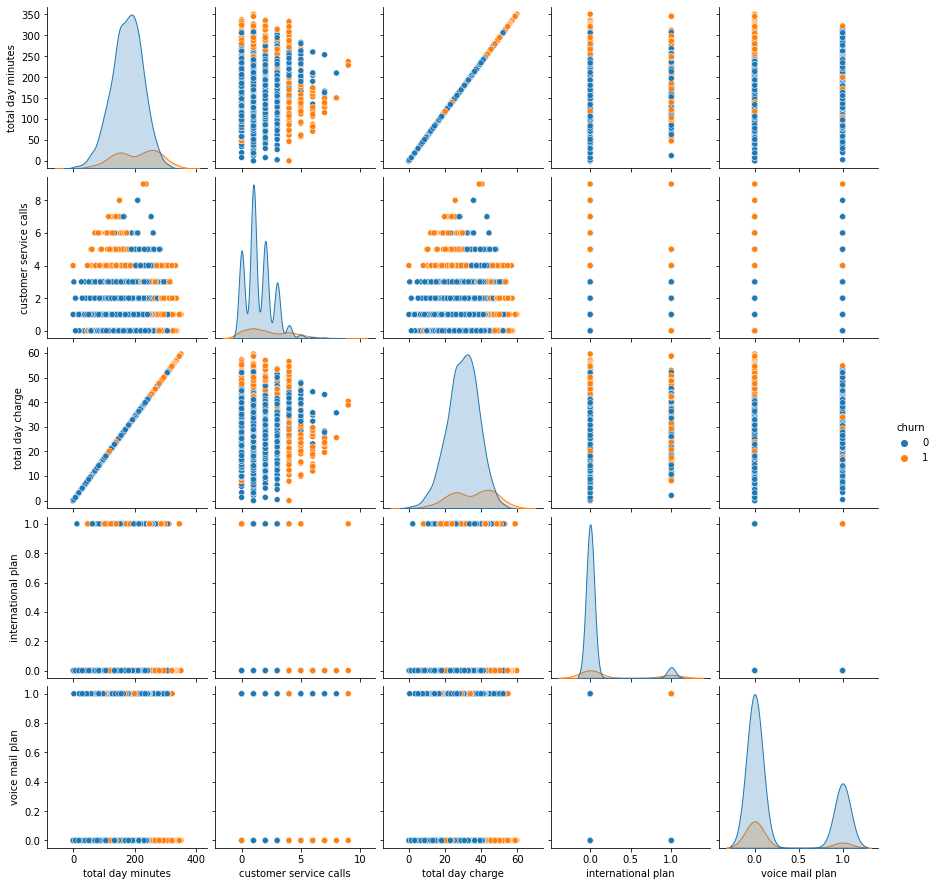

In [16]:
# Convert categorical variables to numeric for easier plotting
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# 1. Pair Plot: Analyze pairwise relationships between features
sns.pairplot(data, hue='churn', vars=['total day minutes', 'customer service calls', 'total day charge', 'international plan', 'voice mail plan'])
plt.show()

**Insights from the Pair Plot:**

**Strong Correlation Between total day minutes and total day charge:**

The plot shows a nearly perfect linear relationship between total day minutes and total day charge. 
This is expected because the charge is directly proportional to the minutes used. 

This relationship indicates that these two variables convey the same information, so you might consider using just one of them in your model to avoid multicollinearity.

**Distribution of customer service calls:**

The customer service calls variable is more scattered, with discrete values

The churned customers (orange points) seem to be more frequent at higher values of customer service calls, suggesting that customers who make more customer service  calls are more likely to churn.


**Impact of international plan and voice mail plan:**

Both international plan and voice mail plan are binary categorical variables (represented as 0 and 1).

Customers with an international plan (represented by points where international plan equals 1) have a noticeable presence among those who churned (orange points). This further supports that having an international plan could be a factor associated with churn.


**Churn Distribution:**

There seems to be a clear distinction in churn behavior when considering multiple variables together. For example, customers with high total day minutes and high customer service calls are more likely to churn.

Churned customers (orange points) are generally found in higher ranges of total day minutes and total day charge, supporting the previous observations that higher usage correlates with higher churn rates.

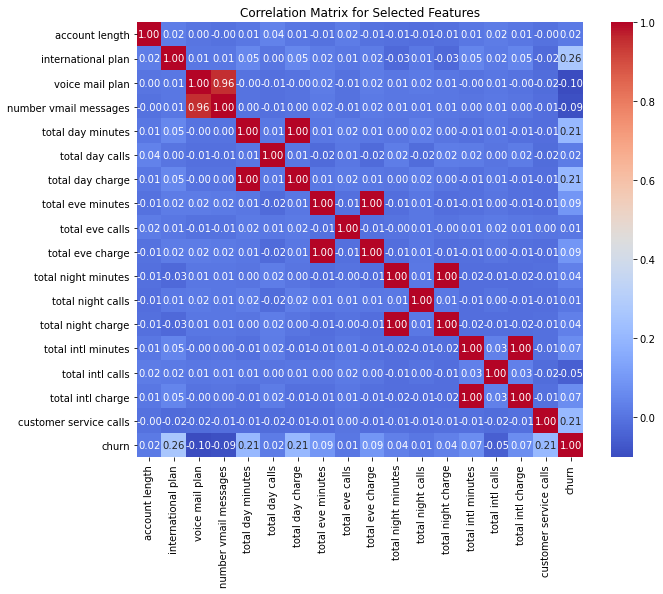

In [17]:
#  Correlation Matrix Heatmap: Show correlations between features
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()

**Insights from the Correlation Matrix:**

**Perfect Correlation between various columns e'g (total day minutes and total day charge and total eve minutes and tota eve charge):**

The correlation between total day minutes and total day charge is 1.00, which indicates a perfect positive correlation. 
This is expected since the charge is likely calculated directly based on the minutes used.

The same goes for the columns: 'number vmail messages', 'total day charge', 'total eve charge', 'total night charge' and 'total intl charge' also have higher or perfect coorelation (0.96 to 1)to their related  columns

To avoid multicollinearity I will drop all the below features after feature engineering since i require some of them to engineer new features.

**Columns to drop after feature eng**

'number vmail messages', 'total day charge', 'total eve charge', 'total night charge' and 'total intl charge',
'total day charge'



**Moderate Correlation (customer service calls and churn):**

The correlation between customer service calls and churn is 0.26, which is a moderate positive correlation. 

This suggests that as the number of customer service calls increases, the likelihood of churn also increases.

 This relationship might indicate that customers who frequently contact customer service are more likely to be dissatisfied and therefore more likely to churn.

**Low to No Correlation:**

Most other features, such as international plan, voice mail plan, and their interaction with churn, show low to negligible correlations with other variables.

 For example:
international plan has a weak positive correlation with churn (0.21).
voice mail plan has a low negative correlation with churn (-0.10), indicating that having a voice mail plan is slightly associated with lower churn, but the relationship is weak.

**Feature Selection Considerations:**

The low correlation of many features with churn suggests that individually, these features may not be strong predictors of churn. However, they might still contribute valuable information when combined with other features in a multivariate model.

**4.3. FEATURE SELECTION**

The below seem to be important features for my my model based on the Exploratory Data Analysis:

**1.customer service calls:**

This feature has shown a moderate positive correlation with churn. It indicates that customers who make more service calls are more likely to churn.

**2.total day minutes:** Given its strong relationship with total day charge and its higher usage among churned customers, this is an important feature to include. 
However, i will drop  (total day charge) to avoid multicollinearity.

**3.international plan:** 

Customers with an international plan have shown a higher likelihood of churning, making this a valuable feature.

**4.voice mail plan:** 

While the correlation is weak, the analysis suggests that it might slightly reduce churn, it could still be valuable in modelling.


5.I will also keep  'account length', 'total day minutes', 'total day calls', total eve minutes', 'total eve calls' 
'total night minutes', 'total night calls' , 'total intl minutes', 'total intl calls' since they have potential.

6.I will drop columns: 'number vmail messages', 'total day charge', 'total eve charge', 'total night charge','total intl charge to avoid multicollinearity since the have high collinearity with their (related minutes columns)

7.I will also drop columns 'phone number','area code','state' which may be irrelevant given their low coorelation to churn

In [18]:
#VIEW COLUMNS OF THE DATA
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [19]:
#Confirm churn columns have been converted to numerical values
data

account length  international plan  voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
3328             192                   0                1   
3329              68                   0                0   
3330              28                   0                0   
3331             184                   1                0   
3332              74                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                

In [20]:
#CHECKING COLUMNS TO CONFIRM IRELEVANT COLUMNS HAVE BEEN DROPPED
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [21]:
# Drop NaN and Infinite Values
data = data.dropna()  # Drop rows with any NaN values
data = data[~data.isin([np.inf, -np.inf]).any(axis=1)]  # Drop rows with any infinite values

# Reset Index
data = data.reset_index(drop=True)

In [22]:
#CHECKING ROWS AND COLUMNS AFTER DROPPING THOSE WITH NAN AND INF VALUES
data.shape

(3333, 18)

**5.MODELLING**

**5.1 MODEL APPROACH**

I will be using logistic regression model since it is well-suited for binary classification problems like  the one we are facing of predicting churn or no churn

I will prepare engineer some new  features and analysis the impact of the enginereed features on performance of the model.

Therefore I will train and Evaluate two models at first and Based on their evaluation I will finally model Decision tree model which should address issues with first two models

**1.Model 1** logistic regression without engineered features

**2.Model 2** logistic regression with engineered features

**3.Model 3** Decison Tree Model

For model 2 , I will Apply the exact parameters of feature engineering in the training data and test data seperately so as to analyze performance of the model on unseen but "similar" data

**TEST TRAIN SPLIT**

In [23]:
#Split the data using TEST TRAIN SPLIT
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['churn']), data['churn'], test_size=0.2, random_state=42)

In [24]:
# Dataset 1: Without Engineered Features
# Keep the original features only
X_train_no_eng = X_train.copy()
X_test_no_eng = X_test.copy()

In [25]:

# Dataset 2: With Engineered Features (apply feature engineering on training data only)
X_train_with_eng = X_train.copy()
X_train_with_eng['day cost per minute'] = X_train['total day charge'] / X_train['total day minutes']
X_train_with_eng['eve cost per minute'] = X_train['total eve charge'] / X_train['total eve minutes']
X_train_with_eng['intl cost per minute'] = X_train['total intl charge'] / X_train['total intl minutes']
X_train_with_eng['customer interaction intensity'] = X_train['customer service calls'] / X_train['account length']

In [26]:
# Dataset 2 cleaning and aligning y_train with cleaned X_train
X_train_with_eng_cleaned = X_train_with_eng.dropna().reset_index(drop=True)
X_train_with_eng_cleaned = X_train_with_eng_cleaned[~X_train_with_eng_cleaned.isin([np.inf, -np.inf]).any(axis=1)].reset_index(drop=True)

# Directly filter y_train to align with the cleaned X_train
y_train_with_eng_cleaned = y_train.iloc[X_train_with_eng_cleaned.index].reset_index(drop=True)

In [27]:

# Apply the same feature engineering to the test data
X_test_with_eng = X_test.copy()
X_test_with_eng['day cost per minute'] = X_test['total day charge'] / X_test['total day minutes']
X_test_with_eng['eve cost per minute'] = X_test['total eve charge'] / X_test['total eve minutes']
X_test_with_eng['intl cost per minute'] = X_test['total intl charge'] / X_test['total intl minutes']
X_test_with_eng['customer interaction intensity'] = X_test['customer service calls'] / X_test['account length']

In [28]:
# Dataset 2 cleaning of  NaN or infinite values and reset index for (test data)
X_test_with_eng_cleaned = X_test_with_eng.dropna().reset_index(drop=True)
X_test_with_eng_cleaned = X_test_with_eng_cleaned[~X_test_with_eng_cleaned.isin([np.inf, -np.inf]).any(axis=1)].reset_index(drop=True)

# Directly filter y_test to align with the cleaned X_test
y_test_with_eng_cleaned = y_test.iloc[X_test_with_eng_cleaned.index].reset_index(drop=True)

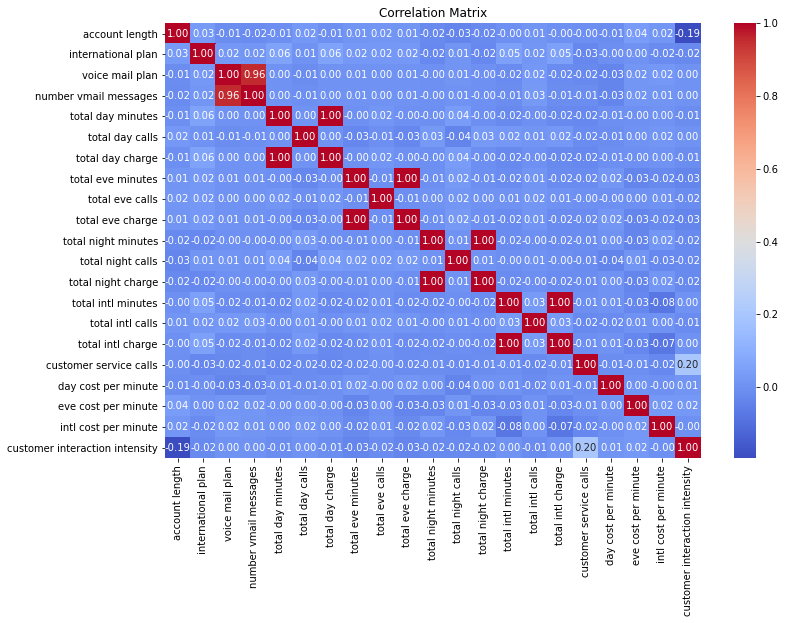

In [29]:
# Visualize the correlation matrix
corr_matrix = X_train_with_eng.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**DROPPING HIGHLY COORELATED FEATURES**

In [30]:
#DROPPING IRELEVANT FEATURES 
data = data.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge','number vmail messages'])

**SCALING THE DATA**

For Dataset 1 (Without Engineered Features): Fit the scaler only on the training data (X_train_no_eng).


For Dataset 2 (With Engineered Features): Fit a separate scaler only on the training data (X_train_with_eng).

**1. Scaling and fitting dataset 1(no enginereed features)**

In [31]:
# Initialize separate scalers for each dataset
scaler_no_eng = StandardScaler()
scaler_with_eng = StandardScaler()

# Scale Dataset 1: Without Engineered Features
X_train_no_eng_scaled = scaler_no_eng.fit_transform(X_train_no_eng)
X_test_no_eng_scaled = scaler_no_eng.transform(X_test_no_eng)


**2. Scaling and fitting dataset 2( with enginereed features)**

In [32]:
# Scale Dataset 2: With Engineered Features
X_train_with_eng_scaled = scaler_with_eng.fit_transform(X_train_with_eng_cleaned)
X_test_with_eng_scaled = scaler_with_eng.transform(X_test_with_eng_cleaned)


**5.2 MODEL TRAINING**

I trainedtwo logistic regression models: 

one using original features and another with engineered features,

I also applied SMOTE for balancing the data with engineered features and specified random stated for Reproducability 

I scaled both data sets and evaluated both models to predict customer churn.

In [33]:
# Initialize the logistic regression model 1
model_no_eng = LogisticRegression()


In [34]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_with_eng_smote, y_train_with_eng_smote = smote.fit_resample(X_train_with_eng_scaled, y_train_with_eng_cleaned)

In [35]:
# Initialize the logistic regression model 2
model_with_eng_smote = LogisticRegression(random_state=42, class_weight='balanced')

In [36]:

# Fit the model for Dataset 1 (Without Engineered Features)
model_no_eng.fit(X_train_no_eng_scaled, y_train)


LogisticRegression()

In [37]:
## Fit the model for Dataset 2 (With Engineered Features)
model_with_eng_smote.fit(X_train_with_eng_smote, y_train_with_eng_smote)

LogisticRegression(class_weight='balanced', random_state=42)

**5.3 MODEL PREDICTION**

Here we will do a prediction for both models to  estimate the output for unseen data based on learned patterns.
 
model 1 :without engineered features and model 2 with engineered features

In [38]:

# Make predictions with both models
#Predictionfor dataset 1
y_pred_no_eng = model_no_eng.predict(X_test_no_eng_scaled)
#Predictionfor dataset 2
y_pred_with_eng_smote = model_with_eng_smote.predict(X_test_with_eng_scaled)



**5.4 MODEL EVALUATION**

I will assess both model's performance using  Classification report and ROC and AUC Curves;

Classification report has metrics such as : accuracy, precision, recall, and F1-score which help to understand the model's performance across different classes. 

ROC (Receiver Operating Characteristic) curves and AUC (Area Under the Curve) are also evaluation metrics that measure a model's ability to distinguish between classes, with AUC representing the overall performance across all classification thresholds.

**MODEL 1(LOGISTIC REGRESSION WITH NO FEATURE ENGINEERING) CLASSIFICATION REPORT**

In [39]:
# Evaluate Model 1 (Without Engineered Features)
print("Model without Engineered Features")
print("Accuracy:", accuracy_score(y_test, y_pred_no_eng))
print("Classification Report:\n", classification_report(y_test, y_pred_no_eng))
print("ROC-AUC:", roc_auc_score(y_test, model_no_eng.predict_proba(X_test_no_eng_scaled)[:,1]))

Model without Engineered Features
Accuracy: 0.856071964017991
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

ROC-AUC: 0.8330301228002659


**MODEL 2 (LOGISITIC REGRESSON WITH FEATURE ENGINEERING) CLASSIFICATION REPORT**

In [40]:
# Evaluate the model
print("\nModel with Engineered Features and SMOTE")
print("Accuracy:", accuracy_score(y_test_with_eng_cleaned, y_pred_with_eng_smote))
print("Classification Report:\n", classification_report(y_test_with_eng_cleaned, y_pred_with_eng_smote))
print("ROC-AUC:", roc_auc_score(y_test_with_eng_cleaned, model_with_eng_smote.predict_proba(X_test_with_eng_scaled)[:,1]))


Model with Engineered Features and SMOTE
Accuracy: 0.4962178517397882
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.51      0.63       561
           1       0.13      0.40      0.19       100

    accuracy                           0.50       661
   macro avg       0.48      0.46      0.41       661
weighted avg       0.72      0.50      0.57       661

ROC-AUC: 0.46233511586452763


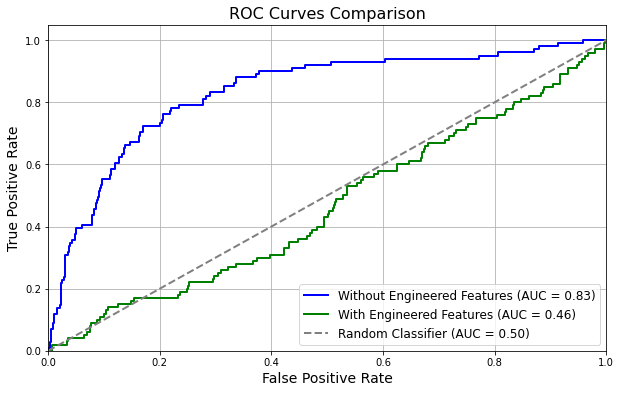

In [41]:
# Calculate ROC curve and AUC for Model 1 (Without Engineered Features)
fpr_no_eng, tpr_no_eng, _ = roc_curve(y_test, model_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1])
roc_auc_no_eng = roc_auc_score(y_test, model_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1])

# Calculate ROC curve and AUC for Model 2 (With Engineered Features)
fpr_with_eng, tpr_with_eng, _ = roc_curve(y_test_with_eng_cleaned, model_with_eng_smote.predict_proba(X_test_with_eng_scaled)[:, 1])
roc_auc_with_eng = roc_auc_score(y_test_with_eng_cleaned, model_with_eng_smote.predict_proba(X_test_with_eng_scaled)[:, 1])

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_no_eng, tpr_no_eng, color='blue', lw=2, label='Without Engineered Features (AUC = {:.2f})'.format(roc_auc_no_eng))
plt.plot(fpr_with_eng, tpr_with_eng, color='green', lw=2, label='With Engineered Features (AUC = {:.2f})'.format(roc_auc_with_eng))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

# Customizing the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves Comparison', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

**MODEL 1 VS MODEL2 COMPARISON AND ANALYSIS**

**1.Model 1  without Engineered Features:**

**Accuracy:** 85.61%

**Precision, Recall, and F1-Score:** 

The model performs well for class 0 (non-churn), with high precision (0.87) and recall (0.98). However, for class 1 (churn), the performance drops significantly with low precision (0.58) and recall (0.18), leading to a poor F1-score (0.27). This indicates that the model is good at predicting non-churn but struggles to accurately predict churn.

**ROC-AUC:** 0.8330, indicating a good overall ability to distinguish between the two classes.

**2.Model with Engineered Features and SMOTE:**

**Accuracy:**

 49.62% (close to random guessing, which suggests a poor model fit).

**Precision, Recall, and F1-Score:**

The performance on class 0 (non-churn) is moderate with precision (0.83) but poor recall (0.51). For class 1 (churn), precision is very low (0.13), though recall is somewhat better (0.40), leading to an F1-score of 0.19. This indicates that, despite using SMOTE to balance the data, the model struggles to make accurate predictions for both classes.

**ROC-AUC:**

0.4623, which is worse than random guessing (AUC of 0.5), indicating the model has poor discriminatory power between churn and non-churn.

**VERDICT**

The Model without Engineered Features outperforms the model with engineered features and SMOTE in all metrics. It has a higher accuracy and a significantly better ROC-AUC, which suggests it is better at distinguishing between churn and non-churn customers overall. However, it still struggles with predicting churn (class 1), as indicated by its lower recall and F1-score for that class.

The Model with Engineered Features and SMOTE, despite efforts to balance the classes using SMOTE, performs poorly overall, with an accuracy close to random guessing and a poor ROC-AUC score. 

I will base the next model on data without engineered features

**Metric Usage:**

**Accuracy**  
was used to get a general sense of model performance, but it is less reliable in this context due to class imbalance.


**Precision, Recall, and F1-Score** 
are critical for evaluating the model's performance on the minority class (churn), especially considering the imbalance. F1-score is particularly useful as it balances precision and recall, providing a single metric to evaluate the model's effectiveness in predicting churn.


**ROC-AUC** was chosen to assess the model’s ability to distinguish between the two classes across all threshold settings, offering a more holistic view of the model’s performance than accuracy alone.

**LIMITATIONS OF THE MODEL**


**Class Imbalance Analysis:**

From the classification reports provided, there is a noticeable imbalance between the classes:

with 566 instances for class 0 and 101 instances for class 1 (for model 1)

with 561 instances for class 0 and 100 instances for class 1 (for model 2)

**Impact of class imbalance on the Logistic Models**

**Impact on Model 1**

The model's high accuracy (85.61%) is misleading because it predominantly predicts the majority class (non-churn). The recall for churn (class 1) is only 18%, indicating that the model misses a large portion of actual churn cases. The low F1-score for churn (0.27) reflects the model's struggle to balance precision and recall for the minority class.

**Impact on Model 2**

Even after applying SMOTE to address class imbalance, the model performs poorly, with an overall accuracy of 49.62%. This indicates that the synthetic data generated by SMOTE did not generalize well to the test set. The precision for churn is 13% and recall is 40%, leading to an F1-score of 0.19. The low ROC-AUC (0.4623) suggests the model's inability to effectively distinguish between churn and non-churn, even with a balanced dataset.



A Decision Tree can be a good model to address class imbalance by inherently focusing on the minority class during the split process, as it creates branches that optimize for both classes.

**MODEL 3 DECISION TREE**

 I intend to model a  decision tree with the original features  wthout feature engineering the data.
 I have already done the preprocessing in logistic regression models so we go straight to training the decision tree 
model


In [42]:
#IMPORTING LIBRARY FOR DECISION TREE MODELIING 
from sklearn.tree import DecisionTreeClassifier

**TRAINING DECISON TREE MODEL**

In [43]:

# Train the Decision Tree Model

# Initialize the Decision Tree model with entropy criterion
model_tree_no_eng = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
# Train the model on Dataset 1 (Without Engineered Features)
model_tree_no_eng.fit(X_train_no_eng_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [44]:
# Make predictions on the test set
y_pred_tree_no_eng = model_tree_no_eng.predict(X_test_no_eng_scaled)


**MODEL EVALUATION**

In [45]:
# Evaluate the model
print("Decision Tree without Engineered Features")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_no_eng))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_no_eng))
print("ROC-AUC:", roc_auc_score(y_test, model_tree_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1]))


Decision Tree without Engineered Features
Accuracy: 0.8920539730134932
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       566
           1       0.68      0.54      0.60       101

    accuracy                           0.89       667
   macro avg       0.80      0.75      0.77       667
weighted avg       0.88      0.89      0.89       667

ROC-AUC: 0.84488157296295


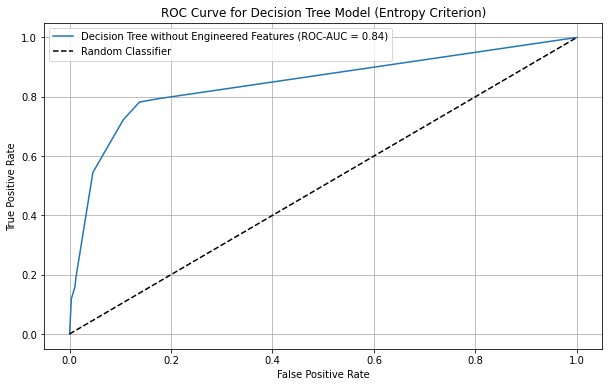

In [46]:

# Plot ROC curve
fpr_tree_no_eng, tpr_tree_no_eng, _ = roc_curve(y_test, model_tree_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree_no_eng, tpr_tree_no_eng, label='Decision Tree without Engineered Features (ROC-AUC = {:.2f})'.format(roc_auc_score(y_test, model_tree_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model (Entropy Criterion)')
plt.legend()
plt.grid(True)
plt.show()

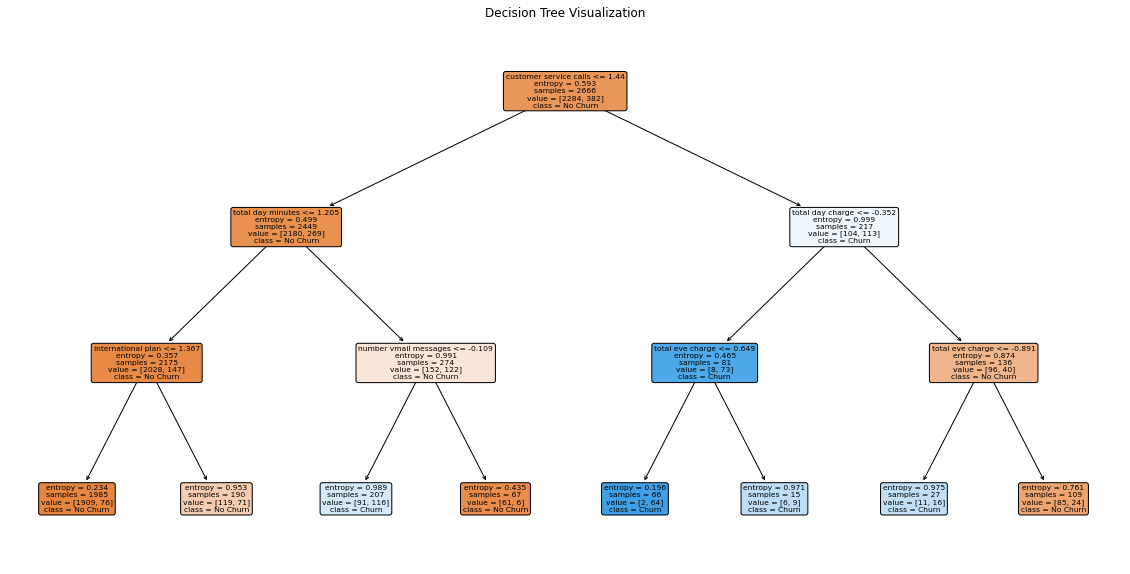

In [47]:

# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model_tree_no_eng, filled=True, rounded=True, feature_names=X_train_no_eng.columns, class_names=['No Churn', 'Churn'])
plt.title("Decision Tree Visualization")
plt.show()

**Key Insights from the Decision Tree:**

**1. Customer Service Calls as a Strong Predictor:**

The first split in the tree is based on the number of customer service calls, indicating that this feature is a significant predictor of churn. Customers with more than 1.44 service calls are more likely to churn.

**2. Total Day Minutes and Charge Features:**

The tree also splits on total day minutes and total day charge, showing these as important features in predicting churn. Lower values of these features are associated with higher churn rates.

**3. International Plan and Voice Mail Plan Influence:**

The tree uses international plan and voice mail plan in further splits, suggesting that customers with specific plan types also show different propensities for churn.

**4. Class Imbalance Reflected:**

The majority of the terminal nodes classify customers as "No Churn," reflecting the class imbalance in the dataset. However, the model identifies pockets of churners, especially in cases with higher customer service interactions and certain plan characteristics.


**COMPARING THE MODEL 1 LOGISTIC REGRESSION VS DECISION TREE MODEL  PERFORMANCE**

**Accuracy:**

Decision Tree: 89.21%
Logistic Regression: 85.61%

**Insight:** 

The decision tree slightly outperforms the logistic regression model in terms of accuracy, indicating it is better at correctly predicting both churn and non-churn cases overall.

**Precision, Recall, and F1-Score:**

**For Class 0 (No Churn):**

Decision Tree: Precision = 0.92, Recall = 0.95, F1-Score = 0.94
Logistic Regression: Precision = 0.87, Recall = 0.98, F1-Score = 0.92

**For Class 1 (Churn):**

Decision Tree: Precision = 0.68, Recall = 0.54, F1-Score = 0.60
Logistic Regression: Precision = 0.58, Recall = 0.18, F1-Score = 0.27

**Insight:**

 The decision tree provides better recall and F1-score for the minority class (churn), making it more effective at identifying churners, though at the cost of slightly lower precision. The logistic regression model performs well for non-churn cases but struggles significantly with churn cases.

**ROC-AUC:**

Decision Tree: 0.8449
Logistic Regression: 0.8330

**Insight:** 

The decision tree has a slightly higher ROC-AUC, indicating a marginally better ability to distinguish between churn and non-churn across all thresholds.

**Summary**

Decision Tree: Shows stronger performance in predicting the minority class (churn) with higher recall and a better balance between precision and recall (as seen in the F1-score). The decision tree's higher ROC-AUC also indicates better overall classification ability.

Logistic Regression: Performs better in terms of precision for non-churn cases but significantly underperforms in detecting churners, with a much lower recall and F1-score for class 1.

**Recommendation:**

The decision tree model is more effective for this dataset, particularly in handling the imbalanced nature of the churn problem, providing better recall and overall discriminatory ability

**HYPER PARAMETER TUNING**


I performed  hyperparameter tuning on the Decision Tree  model to improve its performance further.

This involves selecting the optimal values for parameters that control the tree's structure and learning process (like max_depth, min_samples_split, min_samples_leaf, and criterion) to improve the model's performance by balancing bias and variance, ultimately leading to better generalization on unseen data.

In [48]:
#IMPORT GRID SEARCH
from sklearn.model_selection import GridSearchCV

# Define the model
model_tree = DecisionTreeClassifier(random_state=42,max_depth=3, criterion='entropy')
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the training data (without engineered features)
grid_search.fit(X_train_no_eng_scaled, y_train)

# Print the best parameters and the best ROC-AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Get the best model
best_model_tree_no_eng = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_tree_no_eng = best_model_tree_no_eng.predict(X_test_no_eng_scaled)
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best_tree_no_eng))
print("Classification Report of Best Model:\n", classification_report(y_test, y_pred_best_tree_no_eng))
print("ROC-AUC of Best Model:", roc_auc_score(y_test, best_model_tree_no_eng.predict_proba(X_test_no_eng_scaled)[:, 1]))



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   19.0s


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best ROC-AUC Score: 0.8940429512711556
Accuracy of Best Model: 0.9280359820089955
Classification Report of Best Model:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.80      0.69      0.74       101

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

ROC-AUC of Best Model: 0.9156141762586154


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   25.3s finished


**Improvements made by the Tuned Decision Tree Model:**

**Accuracy:**

Before Tuning: 89.21%
After Tuning: 92.80%
**Improvement:** The accuracy increased by approximately 3.6%, indicating better overall performance in correctly predicting both churn and non-churn cases.

**ROC-AUC:**

Before Tuning: 0.8449
After Tuning: 0.9059
**Improvement: **The ROC-AUC score increased significantly, showing a marked improvement in the model's ability to distinguish between churn


**Precision, Recall, and F1-Score:**

**For Class 0 (No Churn):**

Precision: Improved from 0.92 to 0.95
Recall: Improved from 0.95 to 0.97
F1-Score: Improved from 0.94 to 0.96

**For Class 1 (Churn):**

Precision: Improved from 0.68 to 0.80
Recall: Improved from 0.54 to 0.69
F1-Score: Improved from 0.60 to 0.74
**Improvement:** The tuned model shows significant improvements in all
metrics for both classes, particularly in class 1 (churn), where precision, recall, and F1-score have all increased, indicating better identification and classification of churners.

**VERDICT**

The hyperparameter tuning process significantly improved the decision tree's performance, particularly in its ability to identify churners (class 1). The model's overall accuracy, ROC-AUC, and F1-scores for both classes have all increased, making it a more effective and reliable model for predicting customer churn.
